In [0]:
import pandas as pd 
import numpy as np

In [2]:
ratings = pd.read_csv("ratings.csv")
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
tags = pd.read_csv("tags.csv")
tags.info()
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
movies = pd.read_csv("movies.csv")
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
links = pd.read_csv("links.csv")
links.info()
links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
df = pd.merge(movies, ratings, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [6]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
movieId      100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
userId       100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [12]:
rates = pd.DataFrame(df.groupby('title')['rating'].mean())
rates['number_of_ratings'] = df.groupby('title')['rating'].count()
rates.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


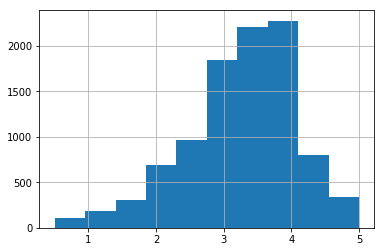

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
rates['rating'].hist(bins=10)

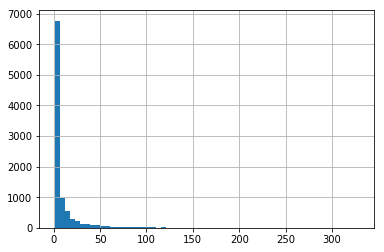

In [15]:
rates['number_of_ratings'].hist(bins=60)

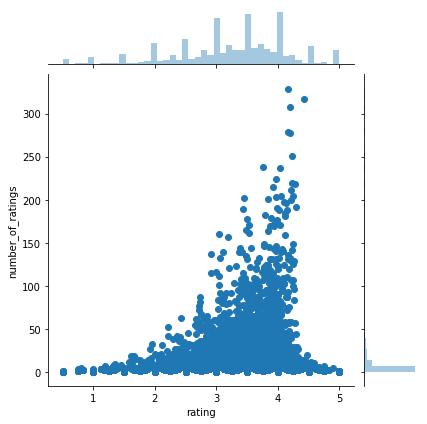

In [16]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=rates)

In [17]:
rates.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [0]:
rates[rates['number_of_ratings'] > 100 ].sort_values('rating', ascending=False).head(10)

,rating,number_of_ratings
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126
"Dark Knight, The (2008)",4.238255,149
"Usual Suspects, The (1995)",4.237745,204
"Princess Bride, The (1987)",4.232394,142


In [18]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']
fc_user_rating = movie_matrix['Fight Club (1999)']
print(fc_user_rating)

userId
1      5.0
2      NaN
3      NaN
4      2.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     0.5
11     NaN
12     NaN
13     NaN
14     NaN
15     2.5
16     3.5
17     4.5
18     4.5
19     5.0
20     NaN
21     2.0
22     3.5
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     3.5
29     NaN
30     NaN
      ... 
581    4.5
582    4.0
583    NaN
584    NaN
585    5.0
586    NaN
587    NaN
588    NaN
589    NaN
590    3.5
591    2.0
592    NaN
593    4.0
594    NaN
595    NaN
596    4.0
597    NaN
598    NaN
599    5.0
600    4.5
601    5.0
602    NaN
603    4.0
604    NaN
605    NaN
606    5.0
607    NaN
608    5.0
609    NaN
610    5.0
Name: Fight Club (1999), Length: 610, dtype: float64


In [20]:
fc_user_rating.mean()

4.272935779816514

In [21]:
similar_to_fc = movie_matrix.corrwith(fc_user_rating)
similar_to_fc

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                         -0.374498
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                -0.044359
*batteries not included (1987)                                                       

In [26]:
corr_fc = pd.DataFrame(similar_to_fc, columns=['Correlation'])
corr_fc.dropna(inplace=True)
corr_fc.head()

,Correlation
title,
"'burbs, The (1989)",-0.374498
(500) Days of Summer (2009),-0.044359
*batteries not included (1987),0.426401
...And Justice for All (1979),1.000000
10 Cent Pistol (2015),1.000000


In [82]:
corr_fc.sort_values('Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
"Impossible, The (Imposible, Lo) (2012)",1.0,3
Water for Elephants (2011),1.0,4
"Trip to Bountiful, The (1985)",1.0,2
Encounters at the End of the World (2008),1.0,3
"Endless Summer, The (1966)",1.0,3


In [28]:
corr_fc = corr_fc.join(rates['number_of_ratings'])
corr_fc.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.374498,17
(500) Days of Summer (2009),-0.044359,42
*batteries not included (1987),0.426401,7
...And Justice for All (1979),1.000000,3
10 Cent Pistol (2015),1.000000,2


In [83]:
corr_fc[corr_fc['number_of_ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,number_of_ratings
title,,
Fight Club (1999),1.000000,218
Outbreak (1995),0.627621,101
Pulp Fiction (1994),0.543465,307
Heat (1995),0.524401,102
Four Weddings and a Funeral (1994),0.524182,103


In [63]:
movie_matrix = df.pivot_table(index='title', columns='userId', values='rating')
zero_mat = movie_matrix.fillna(0)
zero_vals = zero_mat.values

userId                                   1    2    3    4    ...  607  608  609  610
title                                                        ...                    
'71 (2014)                               NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  4.0
'Hellboy': The Seeds of Creation (2004)  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN
'Round Midnight (1986)                   NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN
'Salem's Lot (2004)                      NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN
'Til There Was You (1997)                NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN

[5 rows x 610 columns]


In [78]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(zero_vals)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [79]:
movie_list = movie_matrix.index.to_list()
movie_list.index('Fight Club (1999)')

3011

In [0]:
idx = 'Fight Club (1999)'
distances, indexes = model.kneighbors(zero_mat.loc['Fight Club (1999)', :].values.reshape(1, -1), 
                                      n_neighbors=6)

In [81]:
for i in range(indexes.shape[1]):
  print("movie: {}, distance {}".format(movie_list[indexes[0, i]], distances[0, i]))

movie: Fight Club (1999), distance 4.440892098500626e-16
movie: Matrix, The (1999), distance 0.28606257328028295
movie: Memento (2000), distance 0.33040704494686757
movie: American History X (1998), distance 0.3509458374819996
movie: Kill Bill: Vol. 1 (2003), distance 0.360262413456623
movie: Lord of the Rings: The Fellowship of the Ring, The (2001), distance 0.3642558063841451
